1. Calibrate unconstrained SVI
2. Check Durrelman condition (g(k) > 0 <=> no-butterfly arbitrage)
3. If no arbitrage, use unconstrained parameters
4. Else, do calibrate constrained SVI
5. 

b=0.5, rho=-0.9
Minimum location l_min = -0.35219417
l_star = 2.06474160
최소값 g_plus(l_min) = -8.68042166e-01


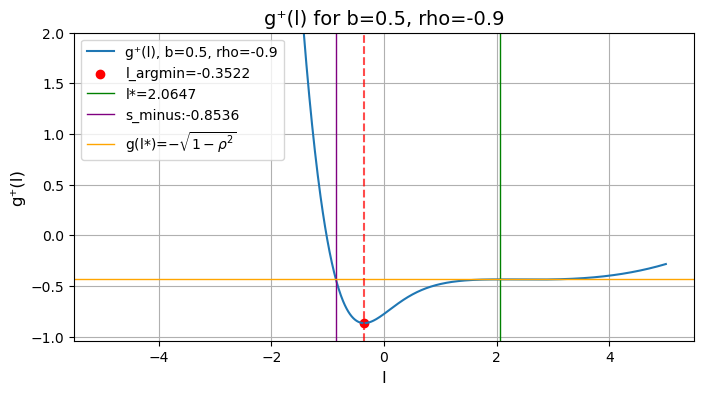

--------------------------------------------------
b=0.5, rho=-0.5
Minimum location l_min = -0.26409148
l_star = 0.57735027
최소값 g_plus(l_min) = -9.28303345e-01


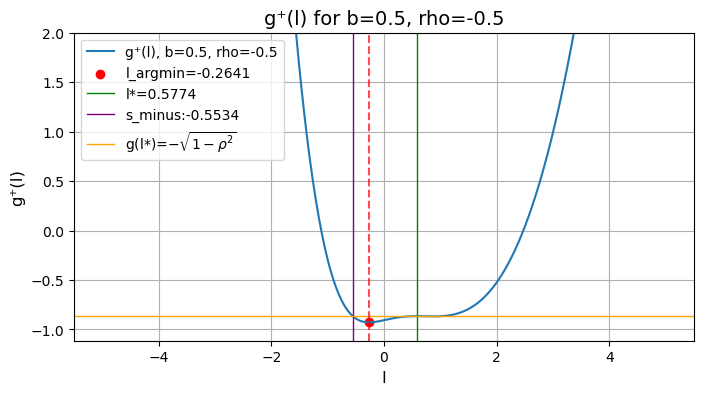

--------------------------------------------------
b=0.5, rho=0.0
Minimum location l_min = 0.00004225
l_star = -0.00000000
최소값 g_plus(l_min) = -1.00000000e+00


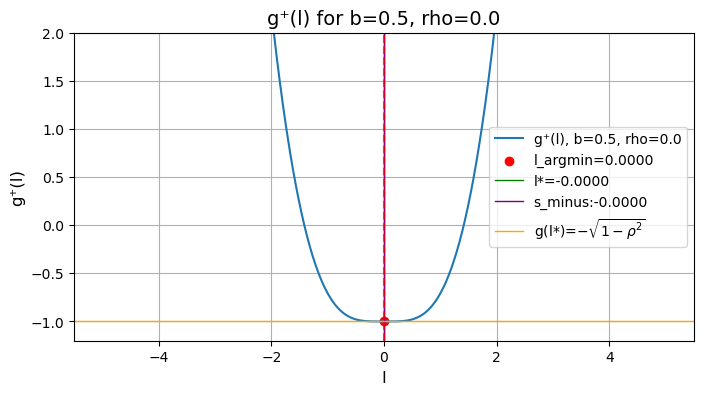

--------------------------------------------------
b=0.5, rho=0.5
Minimum location l_min = -0.57735025
l_star = -0.57735027
최소값 g_plus(l_min) = -8.66025404e-01


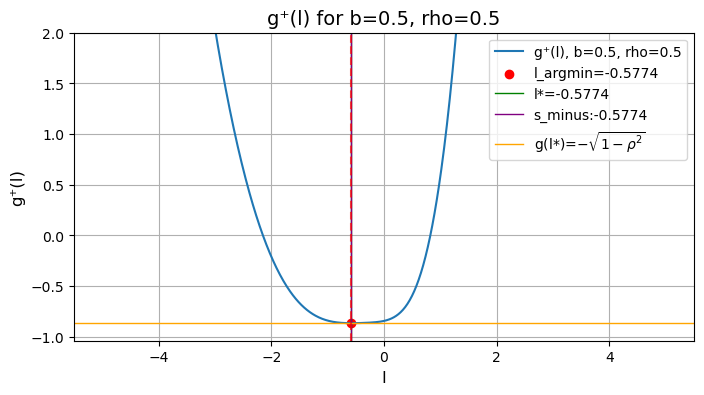

--------------------------------------------------
b=0.5, rho=0.9
Minimum location l_min = -0.35559928
l_star = -2.06474160
최소값 g_plus(l_min) = -4.67134776e-01


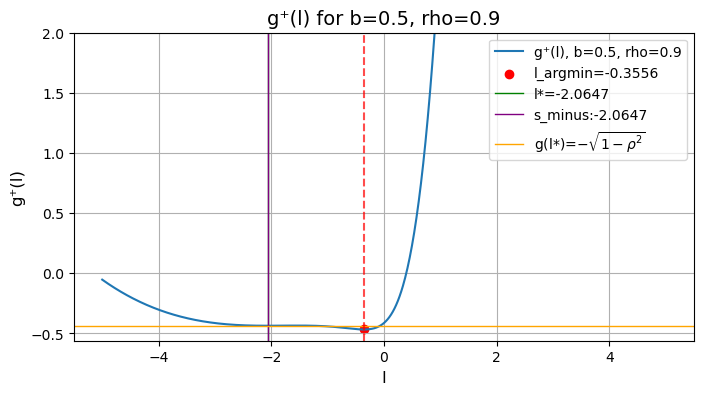

--------------------------------------------------
b=0.8, rho=-0.9
Minimum location l_min = -0.61244069
l_star = 2.06474160
최소값 g_plus(l_min) = -1.18074144e+00


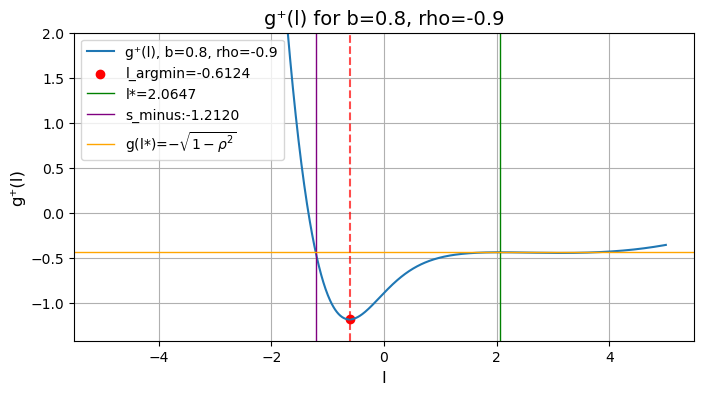

--------------------------------------------------
b=0.8, rho=-0.5
Minimum location l_min = -0.40322384
l_star = 0.57735027
최소값 g_plus(l_min) = -9.85655270e-01


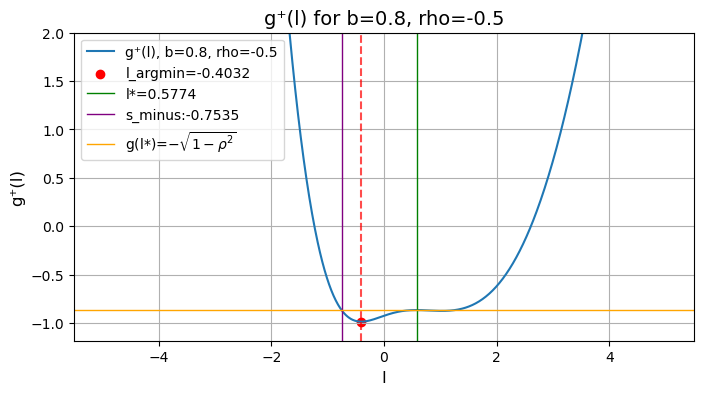

--------------------------------------------------
b=0.8, rho=0.0
Minimum location l_min = 0.00004225
l_star = -0.00000000
최소값 g_plus(l_min) = -1.00000000e+00


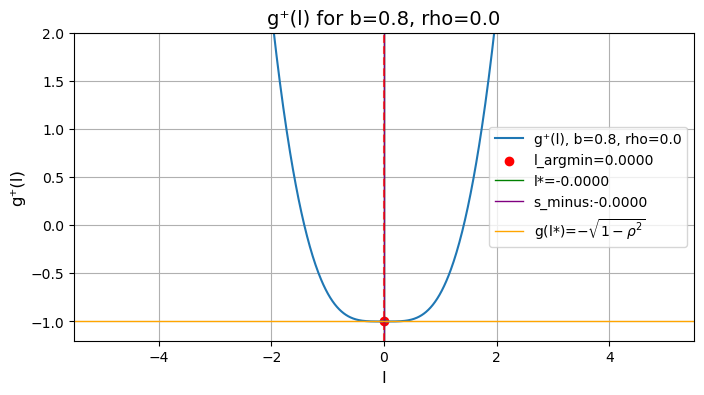

--------------------------------------------------
b=0.8, rho=0.5
Minimum location l_min = -0.57735026
l_star = -0.57735027
최소값 g_plus(l_min) = -8.66025404e-01


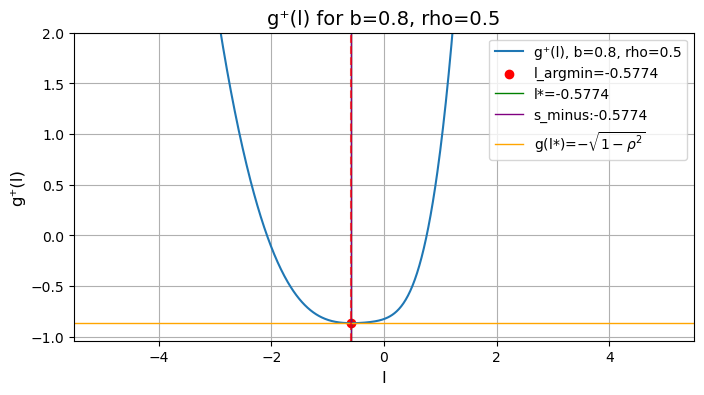

--------------------------------------------------
b=0.8, rho=0.9
Minimum location l_min = -2.06474159
l_star = -2.06474160
최소값 g_plus(l_min) = -4.35889894e-01


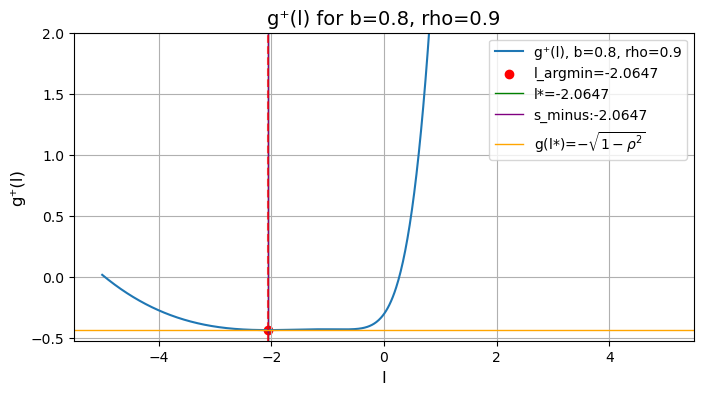

--------------------------------------------------
b=1.0, rho=-0.9
Minimum location l_min = -0.83084465
l_star = 2.06474160
최소값 g_plus(l_min) = -1.51724508e+00


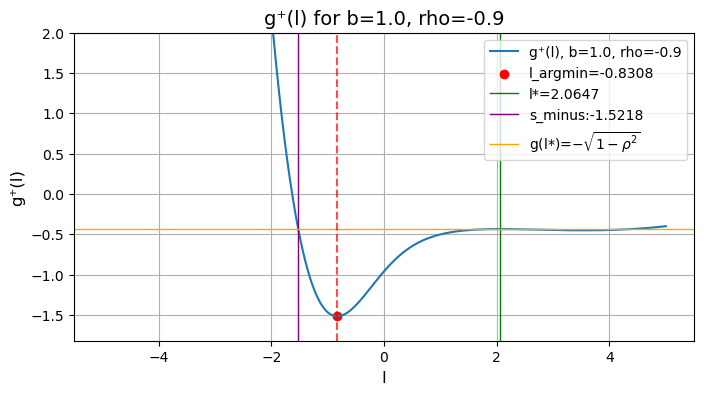

--------------------------------------------------
b=1.0, rho=-0.5
Minimum location l_min = -0.49775052
l_star = 0.57735027
최소값 g_plus(l_min) = -1.03801724e+00


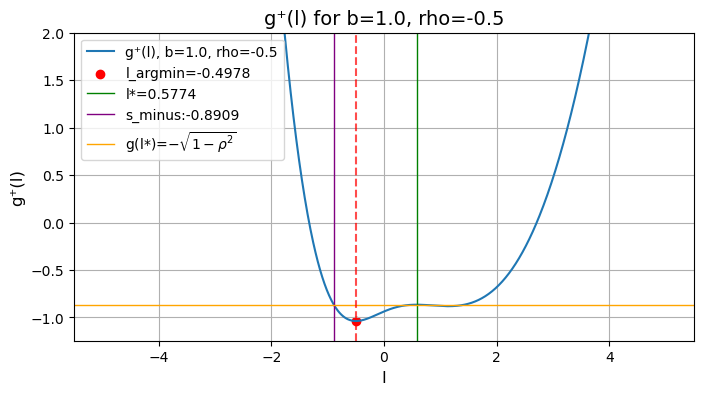

--------------------------------------------------
b=1.0, rho=0.0
Minimum location l_min = 0.00004225
l_star = -0.00000000
최소값 g_plus(l_min) = -1.00000000e+00


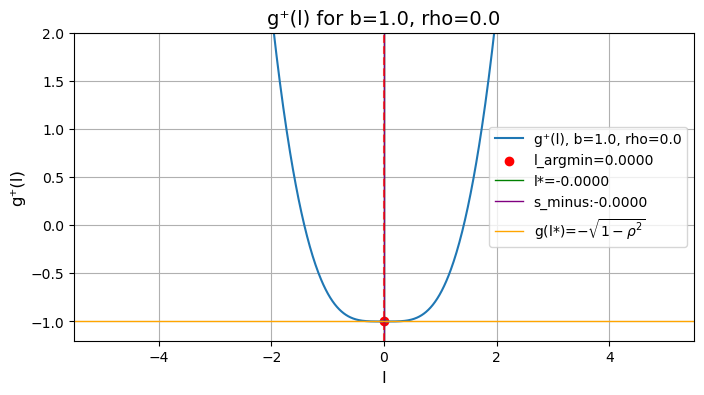

--------------------------------------------------
b=1.0, rho=0.5
Minimum location l_min = -0.57735026
l_star = -0.57735027
최소값 g_plus(l_min) = -8.66025404e-01


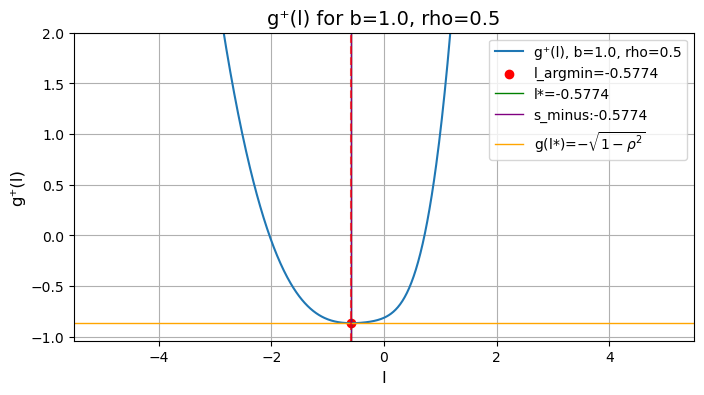

--------------------------------------------------
b=1.2, rho=-0.5
Minimum location l_min = -0.59681712
l_star = 0.57735027
최소값 g_plus(l_min) = -1.10483973e+00


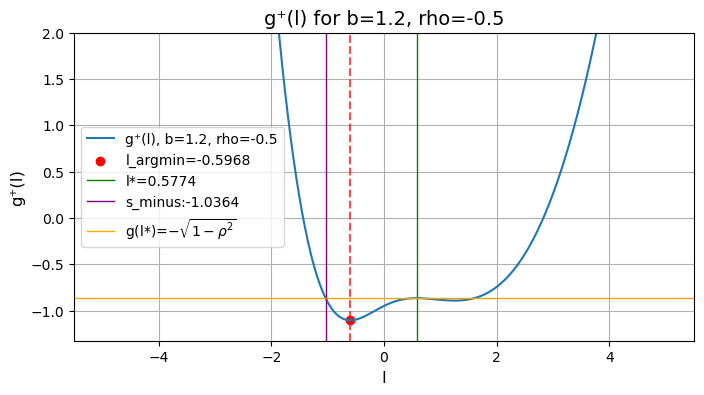

--------------------------------------------------
b=1.2, rho=0.0
Minimum location l_min = 0.00004225
l_star = -0.00000000
최소값 g_plus(l_min) = -1.00000000e+00


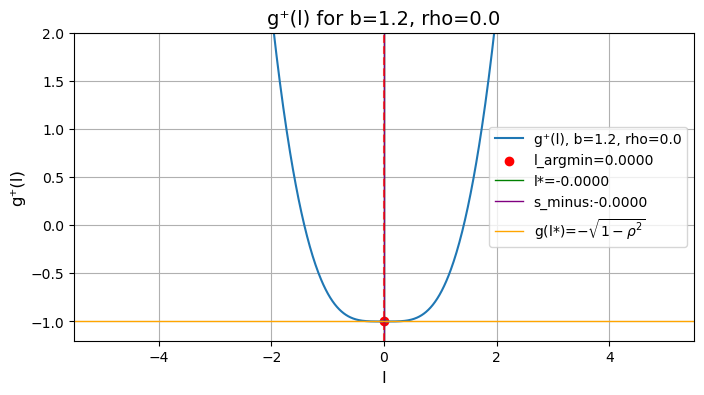

--------------------------------------------------
b=1.2, rho=0.3
Minimum location l_min = -0.31448544
l_star = -0.31448545
최소값 g_plus(l_min) = -9.53939201e-01


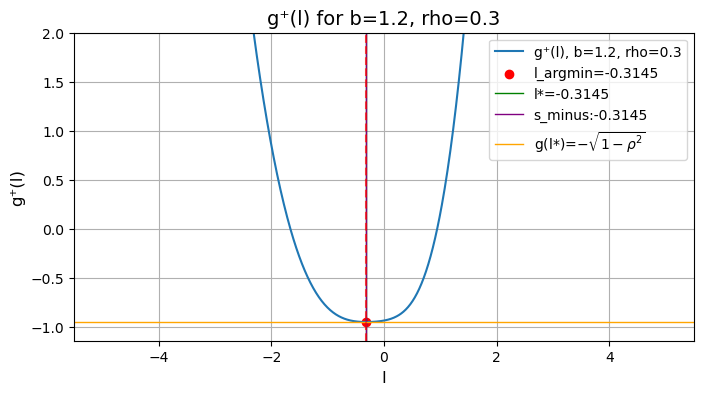

--------------------------------------------------
b=1.5, rho=0.0
Minimum location l_min = 0.00004225
l_star = -0.00000000
최소값 g_plus(l_min) = -1.00000000e+00


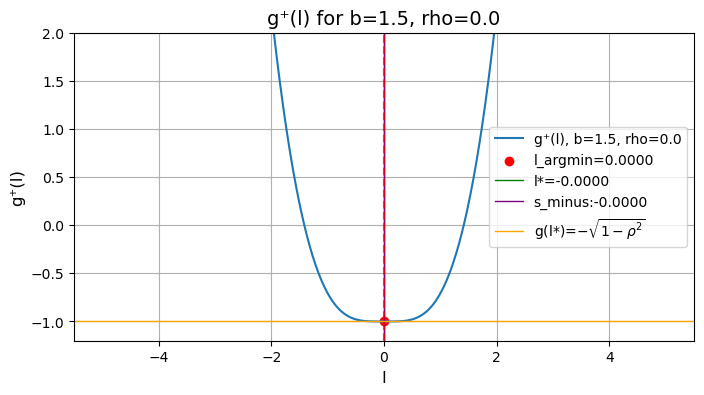

--------------------------------------------------
b=1.5, rho=0.2
Minimum location l_min = -0.20412413
l_star = -0.20412415
최소값 g_plus(l_min) = -9.79795897e-01


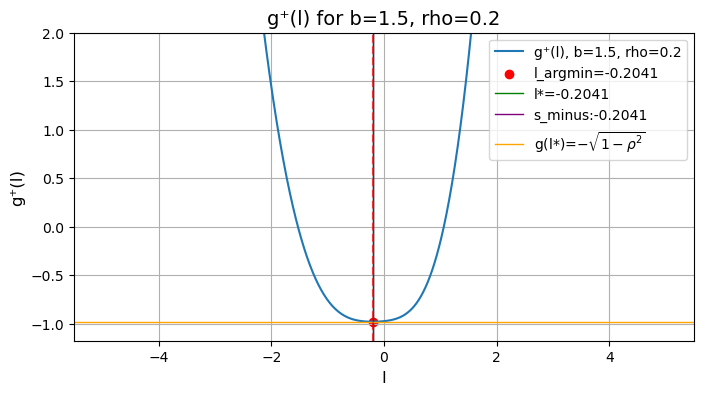

--------------------------------------------------
b=1.7, rho=0.0
Minimum location l_min = 0.00004225
l_star = -0.00000000
최소값 g_plus(l_min) = -1.00000000e+00


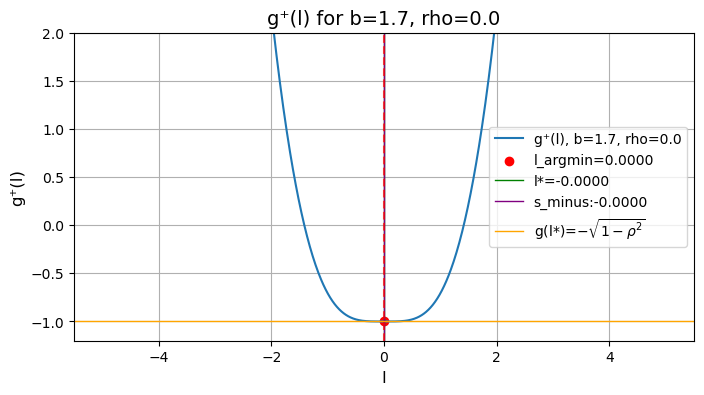

--------------------------------------------------


In [ ]:
import numpy as np
from scipy.optimize import brentq

# def norm_params(a, b, rho, m, sigma):
#     alpha = a/sigma
#     mu = m/sigma
#     return 

def _N(l, alpha, b, rho):
    return alpha + b * (rho * l + np.sqrt(l**2 + 1))

def _dN(l, alpha, b, rho):
    return b * (rho + 1/np.sqrt(l**2 + 1))

def _d2N(l, alpha, b, rho):
    return b /(np.sqrt(l**2 + 1))**3)
    
def _G1(l, alpha, b, rho, mu):
    N = _N(l, alpha, b, rho)
    Np = _dN(l, alpha, b, rho)
    term1 = 1 - Np * ((l + mu)/(2*N) + 1/4)
    term2 = 1 - Np * ((l + mu)/(2*N) - 1/4)
    return term1 * term2
    
def _G2(l, alpha, b, rho, mu):
    N = _N(l, alpha, b, rho)
    Np = _dN(l, alpha, b, rho)
    Npp = _d2N(l, alpha, b, rho)
    return Npp - Np**2/(2*N)

def _G(l, alpha, b, rho, mu, sigma):
    return _G1(l, alpha, b, rho, mu) + _G2(l, alpha, b, rho, mu) / (2*sigma)

def Durrelman(k, a, b, rho, m, sigma):
    alpha = a / sigma
    mu = a / sigma
    l = (k - m) / sigma
    return _G(l, alpha, b, rho, mu, sigma)
    
def L_plus(l, alpha, b, rho):
    return 2*_N(l, alpha, b, rho) * (1/_dN(l, alpha, b, rho) - 1/4) - l

def L_minus(l, alpha, b, rho):
    return 2*_N(l, alpha, b, rho) * (1/_dN(l, alpha, b, rho) + 1/4) - l

def g_plus(l, b, rho):
    term1 = (rho * np.sqrt(l**2 + 1) + l)
    term2 = (np.sqrt(l**2 + 1) * (1/2 - b*rho/4) - b*rho/4)
    term3 = (rho*l + np.sqrt(l**2 + 1))
    return term1**2 * term2 - term3

def g_minus(l, b, rho):
    term1 = (rho * np.sqrt(l**2 + 1) + l)
    term2 = (np.sqrt(l**2 + 1) * (1/2 + b*rho/4) + b*rho/4)
    term3 = (rho*l + np.sqrt(l**2 + 1))
    return term1**2 * term2 - term3

def find_min_g_plus(b, rho):
    # ternary search
    l_upper = 1e6
    l_lower = -1e6
    eps = 1e-8
    max_iter = 500

    iter_count = 0

    while l_upper - l_lower > eps:
        iter_count += 1
        if iter_count > max_iter:
            raise RuntimeError(f"Ternary search did not converge within {max_iter} iterations.")

        l1 = l_lower + (l_upper - l_lower) / 3
        l2 = l_upper - (l_upper - l_lower) / 3

        g1 = g_plus(l1, b, rho)
        g2 = g_plus(l2, b, rho)

        if g1 < g2:
            l_upper = l2
        else:
            l_lower = l1

    l_argmin = (l_lower + l_upper) / 2
    g_min = g_plus(l_argmin, b, rho)

    return l_argmin, g_min

def find_min_g_minus(b, rho):
    l_upper = 1e6
    l_lower = -1e6
    eps = 1e-8
    max_iter = 500

    iter_count = 0

    while l_upper - l_lower > eps:
        iter_count += 1
        if iter_count > max_iter:
            raise RuntimeError(f"Ternary search did not converge within {max_iter} iterations.")

        l1 = l_lower + (l_upper - l_lower) / 3
        l2 = l_upper - (l_upper - l_lower) / 3

        g1 = g_minus(l1, b, rho)
        g2 = g_minus(l2, b, rho)

        if g1 < g2:
            l_upper = l2
        else:
            l_lower = l1

    l_min = (l_lower + l_upper) / 2
    g_min = g_minus(l_min, b, rho)

    return l_min, g_min

# 1. find l*
# 2. decide weather the unique minium point lies in the range
# 3. if it is, find s where s > argmin / s < argmin s.t. g(s)=-sqrt(1-rho^2)
# 4. otherwise, l* becomes s

def get_s_plus(l, b, rho):
    l_star = - rho / (np.sqrt(1 - l**2))
    l_argmin, g_min = find_min_g_plus(b, rho)
    
    def obj(s, b, rho):
        return g_plus(s, b, rho) + np.sqrt(1-rho**2)
    
    if l_argmin > l_star and not np.isclose(l_argmin, l_star):
        s_plus = brentq(obj, a=l_argmin, b=1e6, args=(b, rho))
    else: # monotonically increasing
        s_plus = l_star
    
    return s_plus

def get_s_minus(l, b, rho):
    l_star = - rho / (np.sqrt(1 - l**2))
    l_argmin, g_min = find_min_g_minus(b, rho)
    
    def obj(s, b, rho):
        return g_minus(s, b, rho) + np.sqrt(1-rho**2)
    
    if l_argmin < l_star and not np.isclose(l_argmin, l_star):
        s_minus = brentq(obj, a=-1e6, b=l_argmin, args=(b, rho))
    else: # monotonically decreasing
        s_minus = l_star
    
    return s_minus

def l_plus(l, alpha, b, rho):
    def obj(l, alpha, b, rho):
        return b * g_plus(l, b, rho) - alpha
    s_plus = get_s_plus(l, b, rho)
    
    return brentq(obj, a=s_plus, b=1e6, args=(alpha, b, rho))

def l_minus(l, alpha, b, rho):
    def obj(l, alpha, b, rho):
        return b * g_minus(l, b, rho) - alpha
    s_minus = get_s_minus(l, b, rho)
    return brentq(obj, a=-1e6, b=s_minus, args=(alpha, b, rho))

def F(l, alpha, b, rho, mu):
    if b * (1 + abs(rho)) >= 2:
        raise RuntimeError(f"Wrong parameters combo: b:{b}, rho:{rho}, b*(1+|p|)={b*(1+abs(rho))}")
    s_plus = get_s_plus(l, b, rho)
    s_minus = get_s_minus(l, b, rho)
    
    
def s_minus(l, b, rho):
    pass

In [6]:
import numpy as np
a = 0.0017850765596567814
b = 0.03378792568679291
rho = 0.04547648124707642
m0 = 0.11827690028719924
sigma0 = 0.05425920128815253

a + b*np.sqrt(1 - rho**2)

0.03553804558418499

In [5]:
# 모든 과정을 포함한 완전한 코드 (CSV 로딩 포함)

import pandas as pd

import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# 데이터 로딩

import numpy as np
from scipy.optimize import least_squares, brentq

def svi(k, a, b, rho, m, sigma):
    return a + b*(rho*(k - m) + np.sqrt((k - m)**2 + sigma**2))

# Rescaled parameters
def normalized_svi(l, alpha, b, rho):
    return alpha + b*(rho*l + np.sqrt(l**2 + 1))

def G1(l, alpha, b, rho, mu):
    N = normalized_svi(l, alpha, b, rho)
    N_prime = b*(rho + l/np.sqrt(l**2 + 1))
    return (1 - (l + mu)*N_prime/(2*N)) + N_prime**2/(4*N)

def G2(l, alpha, b, rho):
    N = normalized_svi(l, alpha, b, rho)
    N_prime = b*(rho + l/np.sqrt(l**2 + 1))
    N_double_prime = b/(l**2 + 1)**(3/2)
    return N_double_prime - N_prime**2/(2*N)

# Compute Fukasawa threshold
def compute_Fukasawa_threshold(b, rho):
    def L_diff(alpha):
        l_neg = brentq(lambda l: b*(rho*np.sqrt(l**2+1)+l)**2/(2*(l**2+1)*(alpha+b*(rho*l+np.sqrt(l**2+1)))) - (l-1/4), -10, 0)
        l_pos = brentq(lambda l: b*(-rho*np.sqrt(l**2+1)-l)**2/(2*(l**2+1)*(alpha+b*(-rho*l+np.sqrt(l**2+1)))) - (l-1/4), 0, 10)
        L_neg = 2*(alpha+b*(rho*l_neg+np.sqrt(l_neg**2+1)))/(b*(rho+l_neg/np.sqrt(l_neg**2+1))) - l_neg + 1/4
        L_pos = 2*(alpha+b*(-rho*l_pos+np.sqrt(l_pos**2+1)))/(b*(-rho-l_pos/np.sqrt(l_pos**2+1))) - l_pos + 1/4
        return L_pos - L_neg
    
    alpha_threshold = brentq(L_diff, -b*np.sqrt(1-rho**2)+1e-5, 10)
    return alpha_threshold

# No Arbitrage checking function
def check_no_arbitrage(params):
    a, b, rho, m, sigma = params
    alpha = a / sigma
    mu = m / sigma

    if b*(1 - rho) > 2 or b*(1 + rho) > 2:
        return False

    F_threshold = compute_Fukasawa_threshold(b, rho)
    if alpha <= F_threshold:
        return False

    l_neg = brentq(G2, -10, 0, args=(alpha, b, rho))
    l_pos = brentq(G2, 0, 10, args=(alpha, b, rho))

    G_ratio = lambda l: -G2(l, alpha, b, rho) / (2*G1(l, alpha, b, rho, mu))
    sigma_star_neg = max(G_ratio(np.linspace(-10, l_neg, 1000)))
    sigma_star_pos = max(G_ratio(np.linspace(l_pos, 10, 1000)))

    sigma_star = max(sigma_star_neg, sigma_star_pos)

    return sigma >= sigma_star

# Least squares calibration ensuring no arbitrage
def calibrate_svi_no_arbitrage(k, market_variances, initial_guess):
    def objective(params):
        a, b, rho, m, sigma = params
        if not check_no_arbitrage(params):
            return 1e6*np.ones_like(k)
        return svi(k, a, b, rho, m, sigma) - market_variances

    bounds = ([-np.inf, 0, -0.999, -np.inf, 0.0001], [np.inf, 2, 0.999, np.inf, np.inf])

    result = least_squares(objective, initial_guess, bounds=bounds, method='dogbox', ftol=np.finfo(float).eps)

    return result.x

# Example usage
file_path = 'data.csv'
market_data = pd.read_csv(file_path)
k = market_data['k'].values
w = market_data['w'].values
initial_guess = [0.5 * np.nanmin(w), 0.1, -0.5, 0.1, 0.1]
calibrated_params = calibrate_svi_no_arbitrage(k, w, initial_guess)

print("Calibrated SVI Parameters (No Arbitrage):", calibrated_params)

/var/folders/8w/ymp44q_55w153j7pl6ly_0y00000gn/T/ipykernel_22953/3893294636.py:55: RuntimeWarning: divide by zero encountered in scalar divide
  return n * (1 / np_ - (l) / (2 * n)) + 0.25 - np_ * l / (2 * n)
/var/folders/8w/ymp44q_55w153j7pl6ly_0y00000gn/T/ipykernel_22953/3893294636.py:24: RuntimeWarning: invalid value encountered in multiply
  return 1 - np_ * (l + mu) / (2 * n) + 0.25 * np_ ** 2
/var/folders/8w/ymp44q_55w153j7pl6ly_0y00000gn/T/ipykernel_22953/3893294636.py:10: RuntimeWarning: invalid value encountered in multiply
  return a + b * (rho * (k - m) + np.sqrt((k - m) ** 2 + sigma ** 2))


ValueError: Residuals are not finite in the initial point.

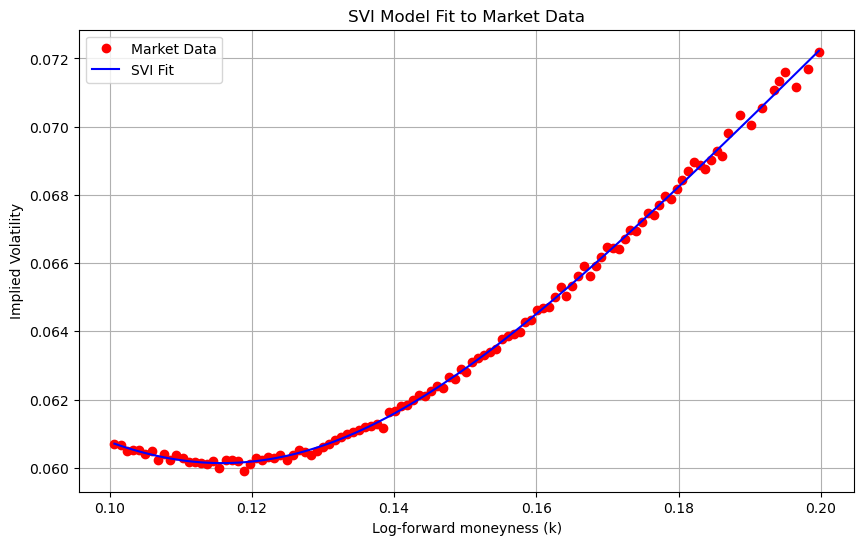

array([0.00178507, 0.03378797, 0.04547783, 0.11827663, 0.05425916])

In [2]:
k = market_data['k'].values
market_variances = market_data['w'].values

# Define SVI model functions from earlier
def svi(k, a, b, rho, m, sigma):
    return a + b*(rho*(k - m) + np.sqrt((k - m)**2 + sigma**2))

# Rescaled parameters
def normalized_svi(l, alpha, b, rho):
    return alpha + b*(rho*l + np.sqrt(l**2 + 1))

def G1(l, alpha, b, rho, mu):
    N = normalized_svi(l, alpha, b, rho)
    N_prime = b*(rho + l/np.sqrt(l**2 + 1))
    return (1 - (l + mu)*N_prime/(2*N)) + N_prime**2/(4*N)

def G2(l, alpha, b, rho):
    N = normalized_svi(l, alpha, b, rho)
    N_prime = b*(rho + l/np.sqrt(l**2 + 1))
    N_double_prime = b/(l**2 + 1)**(3/2)
    return N_double_prime - N_prime**2/(2*N)

# Simplified no-arbitrage checking function for numerical stability
def simple_check_no_arbitrage(params):
    a, b, rho, m, sigma = params
    return (b > 0) and (sigma > 0) and (abs(rho) < 1)

# Least squares calibration with simplified no-arbitrage constraint
def calibrate_svi(k, market_variances, initial_guess):
    def objective(params):
        if not simple_check_no_arbitrage(params):
            return 1e6*np.ones_like(k)
        return svi(k, *params) - market_variances

    bounds = ([-np.inf, 0, -0.999, -np.inf, 0.0001], [np.inf, 2, 0.999, np.inf, np.inf])
    result = least_squares(objective, initial_guess, bounds=bounds, method='dogbox', ftol=np.finfo(float).eps)
    return result.x

# Initial guess for SVI parameters
initial_guess = [0.0, 0.1, 0.0, 0.0, 0.1]

# Perform calibration
calibrated_params = calibrate_svi(k, market_variances, initial_guess)

# Generate fitted implied volatility curve
fitted_variances = svi(k, *calibrated_params)
fitted_volatilities = np.sqrt(fitted_variances)
market_volatilities = np.sqrt(market_variances)

# Plotting implied volatility curve and market data
plt.figure(figsize=(10, 6))
plt.plot(k, market_volatilities, 'ro', label='Market Data')
plt.plot(k, fitted_volatilities, 'b-', label='SVI Fit')
plt.xlabel('Log-forward moneyness (k)')
plt.ylabel('Implied Volatility')
plt.title('SVI Model Fit to Market Data')
plt.legend()
plt.grid(True)
plt.show()

calibrated_params

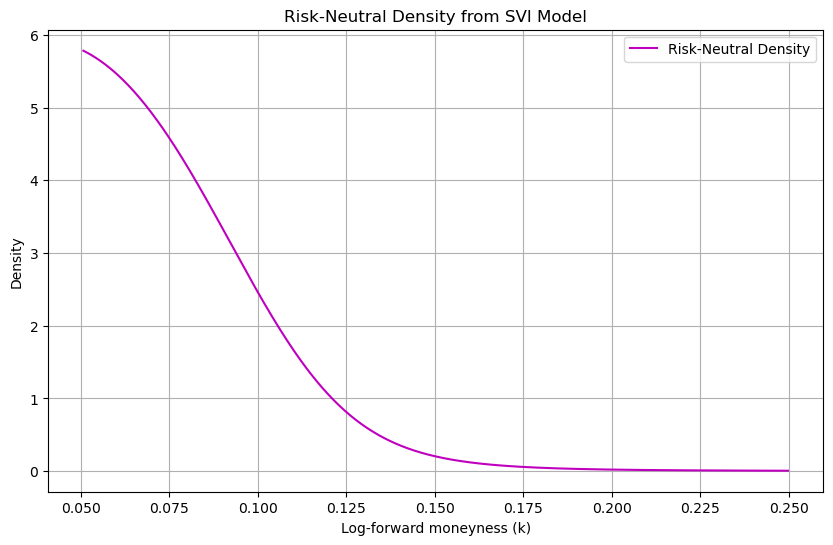

In [2]:
from scipy.stats import norm

# Risk-neutral density 계산 함수
def risk_neutral_density(k, params):
    a, b, rho, m, sigma = params
    w = svi(k, a, b, rho, m, sigma)
    w_prime = b * (rho + (k - m) / np.sqrt((k - m)**2 + sigma**2))
    w_double_prime = b * sigma**2 / (((k - m)**2 + sigma**2)**(3/2))
    d2 = -k / np.sqrt(w) - np.sqrt(w) / 2

    # 식 (1)로부터 p(K) 정의
    density = (1 / np.sqrt(2 * np.pi * w)) * np.exp(-0.5 * d2**2) * (
        w_double_prime / 2 - (w_prime**2 / 4) * (1 / w + 1 / 4) + (1 - k * w_prime / (2 * w))**2
    )
    return density

# k 구간을 더 세밀하게 설정하여 부드러운 density 그래프 얻기
k_fine = np.linspace(min(k) - 0.05, max(k) + 0.05, 500)
density_values = risk_neutral_density(k_fine, calibrated_params)

# Risk-Neutral Density 플롯
plt.figure(figsize=(10, 6))
plt.plot(k_fine, density_values, 'm-', label='Risk-Neutral Density')
plt.xlabel('Log-forward moneyness (k)')
plt.ylabel('Density')
plt.title('Risk-Neutral Density from SVI Model')
plt.legend()
plt.grid(True)
plt.show()